##Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf


##Import Dataset

In [2]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(tf.__version__)

2.18.0


## Dependent And Independent Dataset

In [3]:
x=dataset.iloc[:, 3:-1] # as removeds rows are unique and dosen't make
y=dataset.iloc[:, -1]

In [4]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


##Encoding Categorical Data

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Apply OneHotEncoder to the second and thrid column
# remainder='passthrough' → Keeps the remaining columns unchanged.
# ColumnTransformer → Allows you to apply transformations to specific columns.
# OneHotEncoder() → Encodes the first column as binary values.
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False, drop='first'), [1,2])], remainder='passthrough')

# Transform x
x = ct.fit_transform(x)

# get the columns name back from binary:
column_names = ct.get_feature_names_out()

# changing from numpy array to pandas dataframe 2D
x = pd.DataFrame(x, columns=column_names)

# Clean up column names: remove encoder__ and remainder__
x.columns = [col.replace("encoder__", "").replace("remainder__", "") for col in x.columns]

In [6]:
x.head()

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,0.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,0.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [7]:
x.columns

Index(['Geography_Germany', 'Geography_Spain', 'Gender_Male', 'CreditScore',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

## Splitting the Dataset into Train and Test

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
x_test


,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6252,1.0,0.0,1.0,596.0,32.0,3.0,96709.07,2.0,0.0,0.0,41788.37
4684,0.0,0.0,1.0,623.0,43.0,1.0,0.00,2.0,1.0,1.0,146379.30
1731,0.0,1.0,0.0,601.0,44.0,4.0,0.00,2.0,1.0,0.0,58561.31
4742,1.0,0.0,1.0,506.0,59.0,8.0,119152.10,2.0,1.0,1.0,170679.74
4521,0.0,1.0,0.0,560.0,27.0,7.0,124995.98,1.0,1.0,1.0,114669.79
...,...,...,...,...,...,...,...,...,...,...,...
6412,1.0,0.0,0.0,602.0,53.0,5.0,98268.84,1.0,0.0,1.0,45038.29
8285,0.0,0.0,1.0,609.0,25.0,10.0,0.00,1.0,0.0,1.0,109895.16
7853,0.0,0.0,0.0,730.0,47.0,7.0,0.00,1.0,1.0,0.0,33373.26
1095,0.0,0.0,1.0,692.0,29.0,4.0,0.00,1.0,1.0,0.0,76755.99


In [10]:
x_train.shape

(8000, 11)

## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [12]:
x_test

array([[ 1.72572313, -0.57638802,  0.91324755, ..., -1.54035103,
        -1.02583358, -1.01960511],
       [-0.57946723, -0.57638802,  0.91324755, ...,  0.64920267,
         0.97481699,  0.79888291],
       [-0.57946723,  1.73494238, -1.09499335, ...,  0.64920267,
        -1.02583358, -0.72797953],
       ...,
       [-0.57946723, -0.57638802, -1.09499335, ...,  0.64920267,
        -1.02583358, -1.16591585],
       [-0.57946723, -0.57638802,  0.91324755, ...,  0.64920267,
        -1.02583358, -0.41163463],
       [ 1.72572313, -0.57638802,  0.91324755, ...,  0.64920267,
         0.97481699,  0.12593183]])

## Build ANN Model

In [13]:
#Import Some Tensorfloe lin=braries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU

In [14]:
#lets initialize the ANN
model=Sequential()

In [15]:
#Add the input layer
model.add(Dense(units=11, activation='relu'))

In [16]:
#add 1st hidden layer
model.add(Dense(units=7, activation='relu'))
model.add(Dropout(0.3))

In [18]:
#add 2nd hidden layer
model.add(Dense(units=6, activation='relu'))
model.add(Dropout(0.2))

In [19]:
# add the output layer
model.add(Dense(units=1, activation='sigmoid'))

In [20]:
# Set rules for Training
# defaul learning Rate is 0.001 in adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [21]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

# Create EarlyStopping callback
early_stop = EarlyStopping(
    monitor='val_loss',      # What metric to monitor ('val_loss' is common)
    patience=10,             # How many epochs to wait before stopping after no improvement
    restore_best_weights=True # Optional: restores model weights from the epoch with the best value
)

In [22]:
# Train ANN Classifier

model_history=model.fit(x_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=[early_stop])


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7418 - loss: 0.5962 - val_accuracy: 0.7910 - val_loss: 0.4776
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8072 - loss: 0.4849 - val_accuracy: 0.7910 - val_loss: 0.4599
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7968 - loss: 0.4904 - val_accuracy: 0.7910 - val_loss: 0.4525
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8036 - loss: 0.4600 - val_accuracy: 0.7910 - val_loss: 0.4497
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7998 - loss: 0.4583 - val_accuracy: 0.7910 - val_loss: 0.4485
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7999 - loss: 0.4584 - val_accuracy: 0.7910 - val_loss: 0.4451
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7933 - loss: 0.4553 - val_accuracy: 0.7910 - val_loss: 0.4419
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8078 - loss: 0.4450 - 

In [23]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

## Line Plot Of Training Accuracy and Validation Accuracy

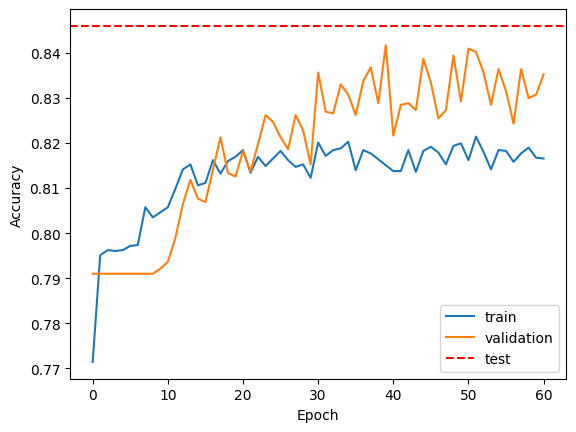

In [40]:
plt.plot(model_history.history['accuracy'], label='accuracy')
# Validation accuracy during training
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')  # Test accuracy line is horizontal since we evaluate it only once after training.
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','validation','test'], loc='best')
plt.show()


## Line Plot of Cost Function during Validation And Training

<function matplotlib.pyplot.show(close=None, block=None)>

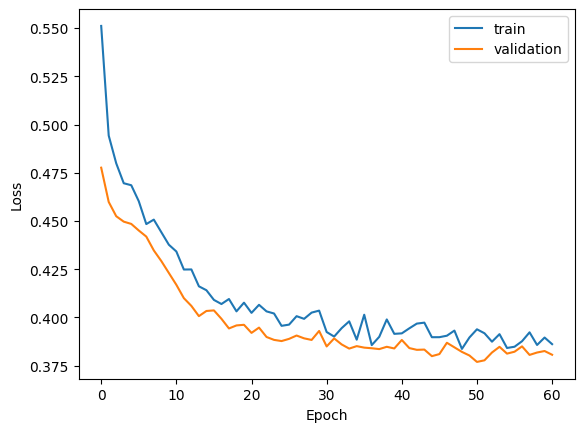

In [28]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','validation'],loc='best')
plt.show

## Prediction Of Test Data

In [30]:
y_pred=model.predict(x_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


##Confustion Matrix

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
test_accuracy=accuracy_score(y_test, y_pred)
print(test_accuracy)

[[1589   18]
 [ 290  103]]
0.846


## Classification Report

In [41]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1607
           1       0.85      0.26      0.40       393

    accuracy                           0.85      2000
   macro avg       0.85      0.63      0.66      2000
weighted avg       0.85      0.85      0.81      2000

